In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("owid-covid-data.csv")
print(df.columns)
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [30]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [31]:
## selecting key columns
selected_columns = ['date', 'location', 'total_cases', 'total_deaths', 
                      'new_cases', 'new_deaths', 'total_vaccinations','population']
df_key = df[selected_columns]

In [32]:
print(df_key['location'].unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe' 'European Union (27)' 'Faroe Islands' 'Falkland Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'Fr

In [33]:
##I want to analyze the East African countries covid data
eac_countries = [
    'Burundi', 
    'Democratic Republic of Congo', 
    'Kenya', 
    'Rwanda', 
    'South Sudan', 
    'Tanzania', 
    'Uganda',
    'Somalia',
]

## filter the data for East African countries
df_eac = df_key[df_key['location'].isin(eac_countries)].copy()
print(df_eac['location'].unique())

['Burundi' 'Democratic Republic of Congo' 'Kenya' 'Rwanda' 'Somalia'
 'South Sudan' 'Tanzania' 'Uganda']


In [34]:
# Drop rows with missing critical values
df_eac.dropna(subset=['date', 'location', 'total_cases', 'total_deaths'], inplace=True)

# Convert 'date' to datetime
df_eac['date'] = pd.to_datetime(df_eac['date'])

# Fill missing numeric values with 0 or appropriate method
numeric_cols = ['new_cases', 'new_deaths', 'total_vaccinations']
df_eac[numeric_cols] = df_eac[numeric_cols].fillna(0)
df_eac


,date,location,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations,population
58604,2020-01-05,Burundi,0.0,0.0,0.0,0.0,0.0,12889583
58605,2020-01-06,Burundi,0.0,0.0,0.0,0.0,0.0,12889583
58606,2020-01-07,Burundi,0.0,0.0,0.0,0.0,0.0,12889583
58607,2020-01-08,Burundi,0.0,0.0,0.0,0.0,0.0,12889583
58608,2020-01-09,Burundi,0.0,0.0,0.0,0.0,0.0,12889583
...,...,...,...,...,...,...,...,...
398424,2024-07-31,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588
398425,2024-08-01,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588
398426,2024-08-02,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588
398427,2024-08-03,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588


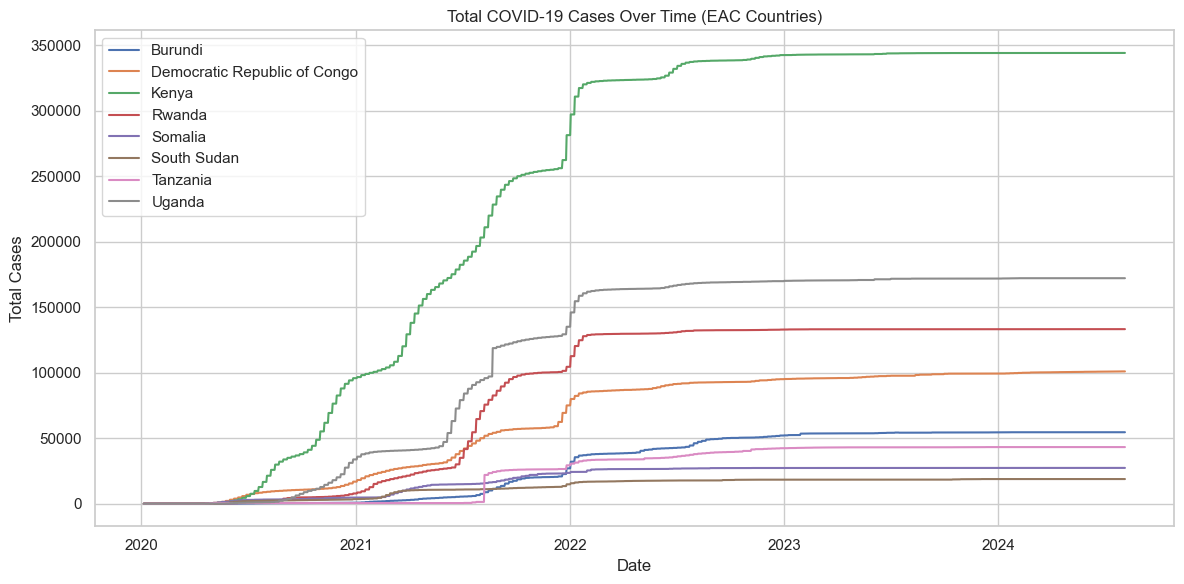

In [35]:
# Set style
sns.set(style='whitegrid')

# Plot total cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in df_eac['location'].unique():
    country_data = df_eac[df_eac['location'] == country]
    sns.lineplot(data=country_data, x='date', y='total_cases', label=country)

plt.title('Total COVID-19 Cases Over Time (EAC Countries)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

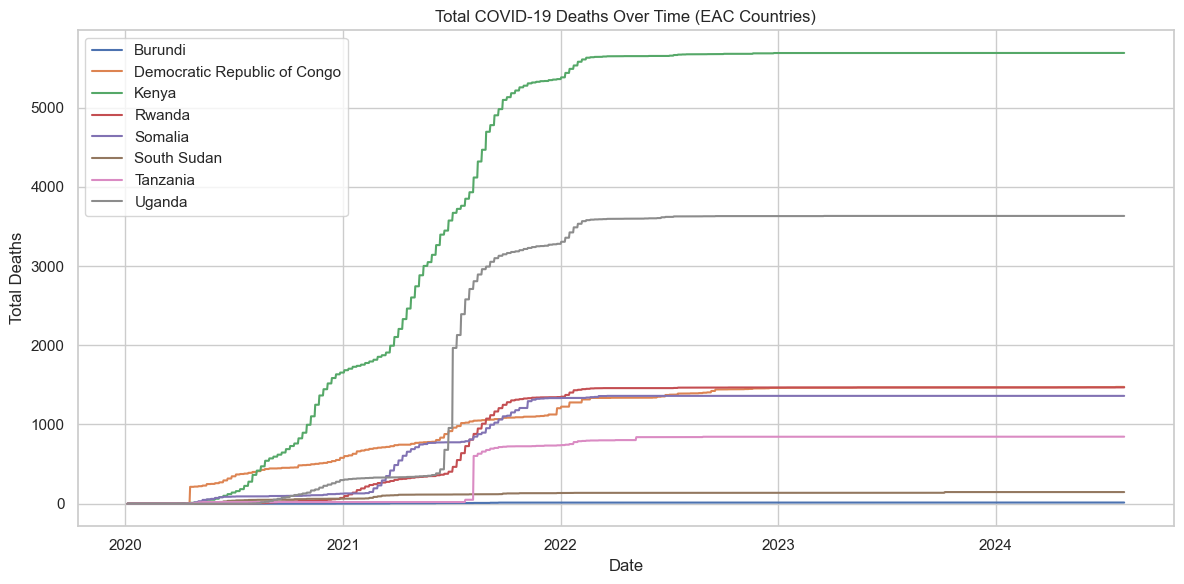

In [36]:
plt.figure(figsize=(12, 6))
for country in df_eac['location'].unique():
    country_data = df_eac[df_eac['location'] == country]
    sns.lineplot(data=country_data, x='date', y='total_deaths', label=country)

plt.title('Total COVID-19 Deaths Over Time (EAC Countries)')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

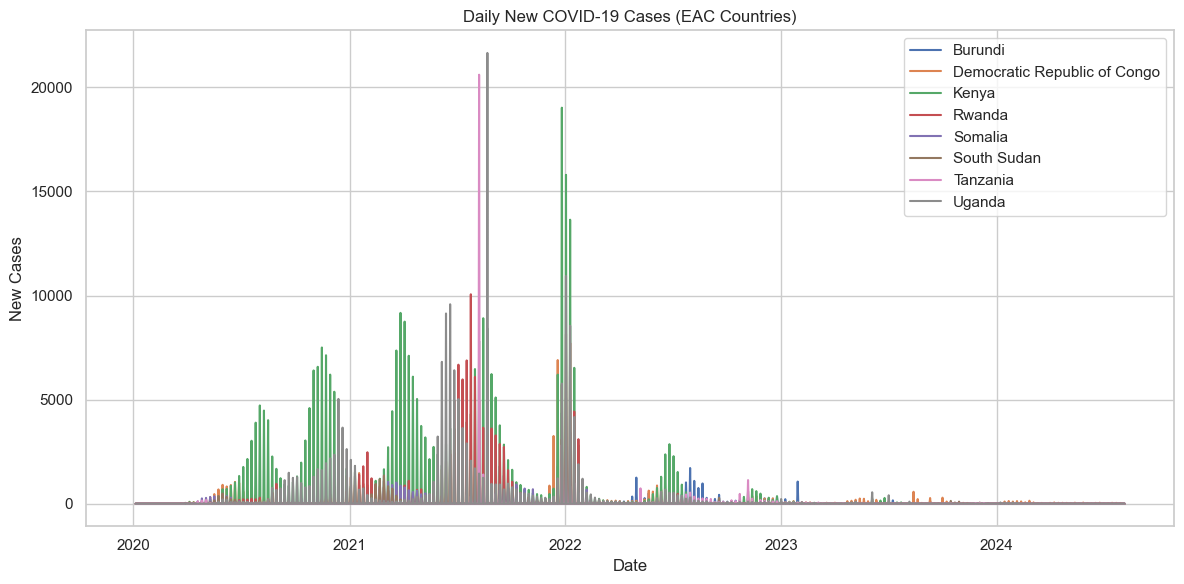

In [38]:
# Plot daily new cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in df_eac['location'].unique():
    country_data = df_eac[df_eac['location'] == country]
    sns.lineplot(data=country_data, x='date', y='new_cases', label=country)

plt.title('Daily New COVID-19 Cases (EAC Countries)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

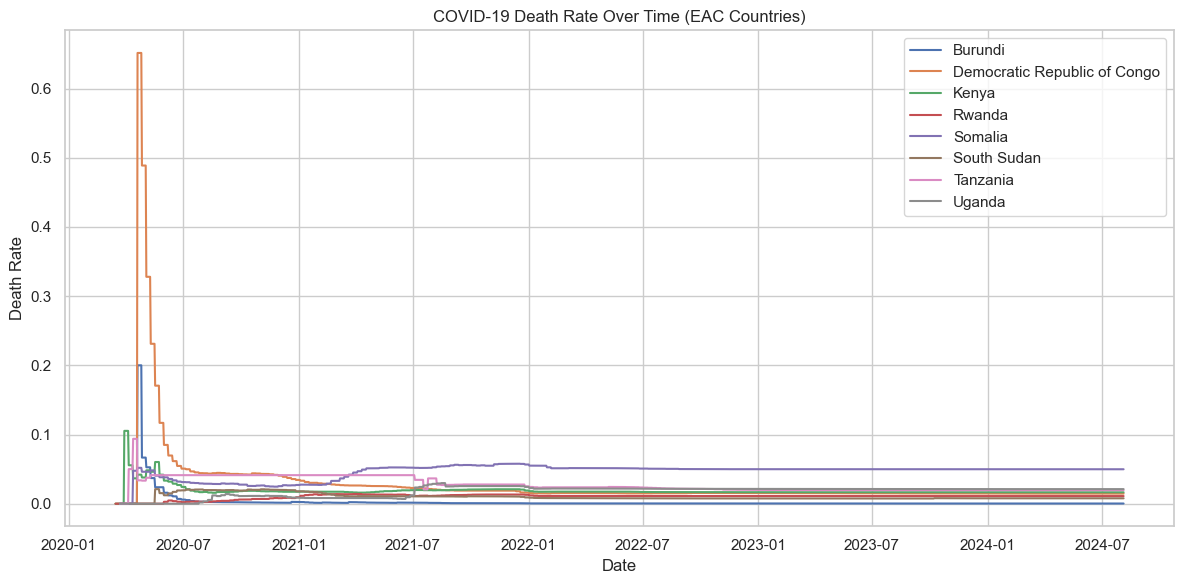

In [ ]:
# Add death rate column
df_eac['death_rate'] = df_eac['total_deaths'] / df_eac['total_cases']

# Plot death rate for each country over time
plt.figure(figsize=(12, 6))
for country in df_eac['location'].unique():
    country_data = df_eac[df_eac['location'] == country]
    sns.lineplot(data=country_data, x='date', y='death_rate', label=country)

plt.title('COVID-19 Death Rate Over Time (EAC Countries)')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

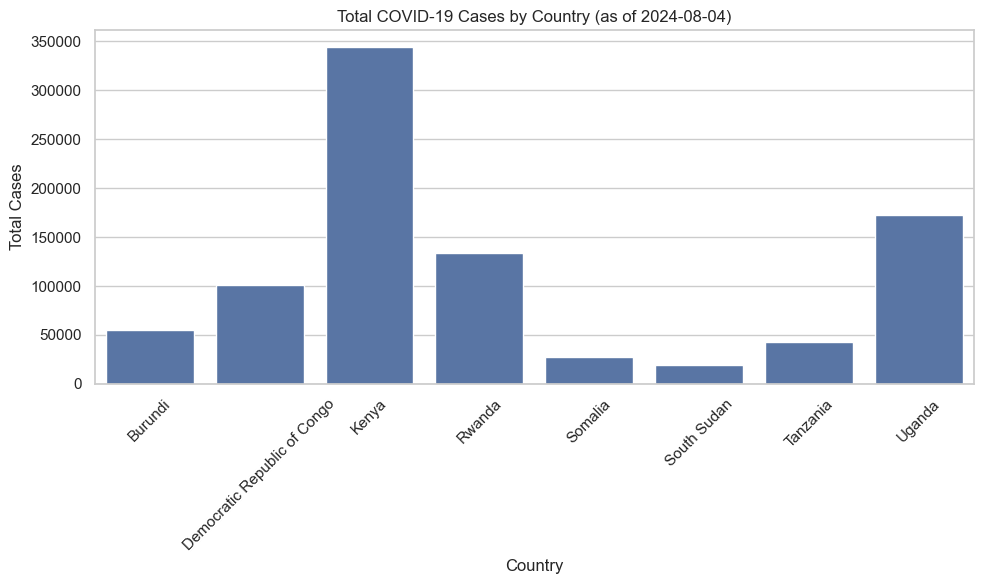

In [ ]:
#Total Cases by Country (Latest Date)
latest_date = df_eac['date'].max()
latest = df_eac[df_eac['date'] == latest_date]

plt.figure(figsize=(10, 6))
sns.barplot(data=latest, x='location', y='total_cases')
plt.title(f'Total COVID-19 Cases by Country (as of {latest_date.date()})')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

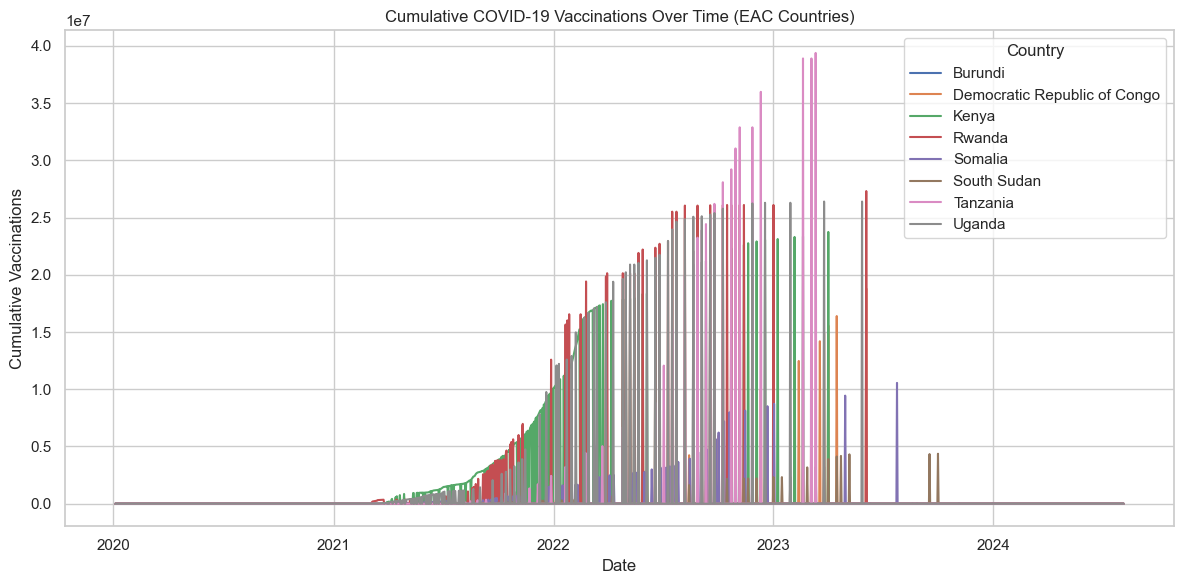

In [39]:
#Plot Cumulative Vaccinations Over Time for Selected Countries
plt.figure(figsize=(12, 6))
for country in df_eac['location'].unique():
    country_data = df_eac[df_eac['location'] == country]
    sns.lineplot(data=country_data, x='date', y='total_vaccinations', label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time (EAC Countries)')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

C:\Users\Mochez\AppData\Local\Temp\ipykernel_3936\4131281075.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_vaccination, x='location', y='vaccination_percentage', palette='viridis')


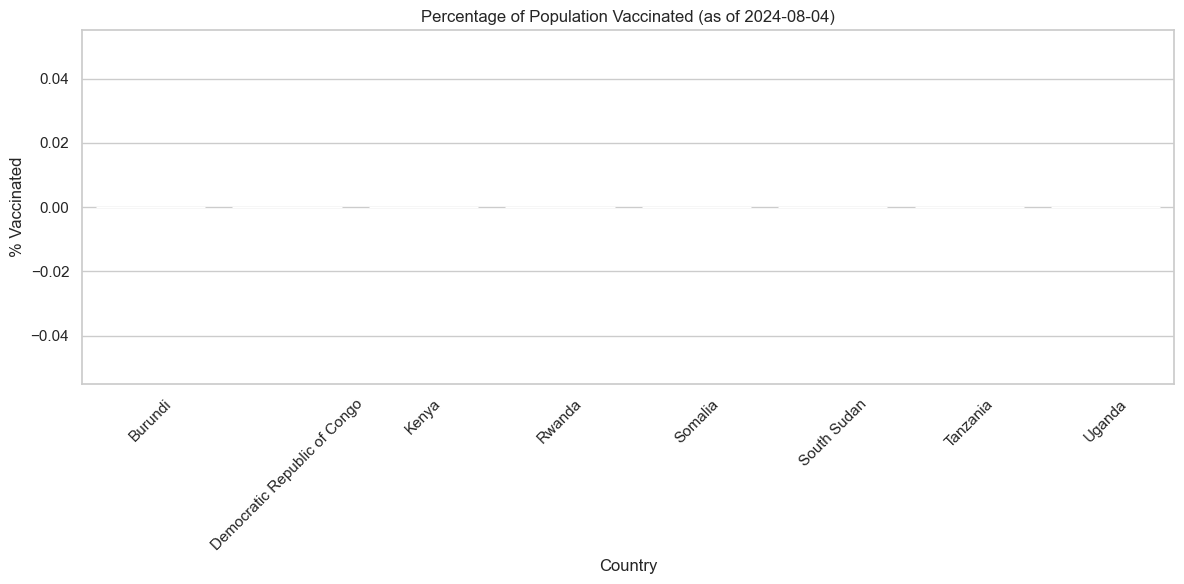

,date,location,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations,population,vaccination_percentage
58604,2020-01-05,Burundi,0.0,0.0,0.0,0.0,0.0,12889583,0.0
58605,2020-01-06,Burundi,0.0,0.0,0.0,0.0,0.0,12889583,0.0
58606,2020-01-07,Burundi,0.0,0.0,0.0,0.0,0.0,12889583,0.0
58607,2020-01-08,Burundi,0.0,0.0,0.0,0.0,0.0,12889583,0.0
58608,2020-01-09,Burundi,0.0,0.0,0.0,0.0,0.0,12889583,0.0
...,...,...,...,...,...,...,...,...,...
398424,2024-07-31,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588,0.0
398425,2024-08-01,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588,0.0
398426,2024-08-02,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588,0.0
398427,2024-08-03,Uganda,172154.0,3632.0,0.0,0.0,0.0,47249588,0.0
